# Analytics Vidhya Loan Approval Status Prediction Competition

# Problem

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Data

- Variable: Description
- Loan_ID: Unique Loan ID
- Gender: Male/ Female
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant Education (Graduate/ Under Graduate)
- Self_Employed: Self employed (Y/N)
- Applicant Income: Applicant income
- Coapplicant Income: Coapplicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of loan in months
- Credit_History: credit history meets guidelines
- Property_Area: Urban/ Semi Urban/ Rural
- Loan_Status: Loan approved (Y/N)

## Loading Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [2]:
df = pd.read_csv('loan_train.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Filling in missing data

### Gender

In [4]:
df[df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [5]:
df['Gender'] = df.groupby(['Married','Education','Dependents'])['Gender'].ffill().bfill()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Married

In [7]:
df[df.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Male,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [8]:
df['Married'] = df.groupby(['Gender','Education','Self_Employed'])['Married'].ffill().bfill()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Dependents

In [10]:
df[df.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Female,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Male,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Female,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [11]:
df['Dependents'] = df.groupby(['Gender','Education','Married'])['Dependents'].ffill().bfill()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Self-Employed

In [13]:
df[df.Self_Employed.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,No,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,Yes,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,Yes,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,Yes,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,Yes,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [14]:
df['Self_Employed'] = df.groupby(['Gender','Education','Married','Dependents'])['Self_Employed'].ffill().bfill()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Loan Amount

In [16]:
df[df.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,Yes,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [17]:
df['LoanAmount'] = df.groupby(['Gender','Education','Married','Dependents','Self_Employed']).\
transform(lambda x: x.fillna(x.mean()))['LoanAmount']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           613 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [19]:
df[df.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
338,LP002113,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban,N


In [20]:
# drop the one row above

df = df[df['Loan_ID']!='LP002113']

### Loan_Amount_Term

In [21]:
df[df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,Yes,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [22]:
df['Loan_Amount_Term'] = df.groupby(['Gender','Education','Married','Dependents','Self_Employed']).\
transform(lambda x: x.fillna(x.mean()))['Loan_Amount_Term']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              613 non-null object
Gender               613 non-null object
Married              613 non-null object
Dependents           613 non-null object
Education            613 non-null object
Self_Employed        613 non-null object
ApplicantIncome      613 non-null int64
CoapplicantIncome    613 non-null float64
LoanAmount           613 non-null float64
Loan_Amount_Term     613 non-null float64
Credit_History       563 non-null float64
Property_Area        613 non-null object
Loan_Status          613 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 67.0+ KB


### Credit History

In [24]:
df[df.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.00000,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.00000,360.0,NaN,Semiurban,N
30,LP001091,Male,No,1,Graduate,No,4166,3369.0,201.00000,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.00000,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.00000,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.00000,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.00000,360.0,NaN,Semiurban,Y
95,LP001326,Male,Yes,0,Graduate,No,6782,0.0,153.12844,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.00000,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.00000,360.0,NaN,Rural,Y


In [25]:
df['Credit_History'] = df.groupby(['Gender','Education','Married','Dependents','Self_Employed'])['Credit_History'].ffill().bfill()

In [26]:
df['Credit_History'] = df.Credit_History.astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              613 non-null object
Gender               613 non-null object
Married              613 non-null object
Dependents           613 non-null object
Education            613 non-null object
Self_Employed        613 non-null object
ApplicantIncome      613 non-null int64
CoapplicantIncome    613 non-null float64
LoanAmount           613 non-null float64
Loan_Amount_Term     613 non-null float64
Credit_History       613 non-null int64
Property_Area        613 non-null object
Loan_Status          613 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 67.0+ KB


## Checking if there are weird labels and fixing them if they exist

In [28]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

In [29]:
for col in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status']:
    print(df[col].value_counts(),'\n')

Male      502
Female    111
Name: Gender, dtype: int64 

Yes    406
No     207
Name: Married, dtype: int64 

0     354
1     104
2     102
3+     53
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    133
Name: Education, dtype: int64 

No     524
Yes     89
Name: Self_Employed, dtype: int64 

2500     9
6000     6
4583     6
2600     6
5000     5
4166     5
3750     5
3333     5
2400     4
8333     4
2583     4
6250     4
3000     3
3400     3
4333     3
3500     3
3167     3
3166     3
4000     3
10000    3
2333     3
5417     3
12000    2
3173     2
3510     2
2917     2
3717     2
5500     2
4750     2
3466     2
        ..
3775     1
6782     1
2718     1
4735     1
3716     1
9357     1
2698     1
2699     1
3727     1
4755     1
2708     1
4758     1
14999    1
15000    1
2717     1
2720     1
2750     1
674      1
3748     1
5124     1
5829     1
5800     1
2149     1
3762     1
4931     1
5815     1
5818     1
5819     1
5821     1
3691     1
Name: ApplicantIn

In [30]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

## Exploratory Data Analysis (EDA)

In [31]:
cat_features = df.select_dtypes(include=['object']).columns.values
num_features = df.select_dtypes(exclude=['object']).columns.values

In [32]:
cat_features

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'], dtype=object)

In [33]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})

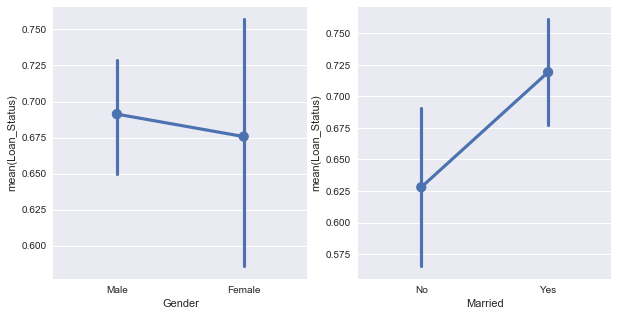

In [34]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Gender', y='Loan_Status', data=df, ax=ax1)
sns.pointplot(x='Married', y='Loan_Status', data=df, ax=ax2)

- Males are slightly more likely to get approval for loans
- Married people have way much higher chance of getting approval for loans

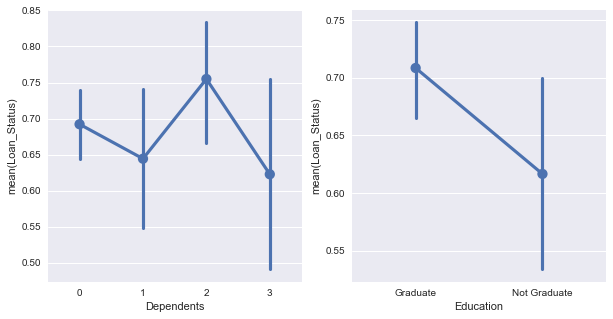

In [35]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Dependents', y='Loan_Status', data=df, ax=ax1)
sns.pointplot(x='Education', y='Loan_Status', data=df, ax=ax2)

- People who have two dependents or no one have highest chance of getting approval for loans. Those with one or more than three dependents are less likely to get approval for loans
- People with Masters' degree or higher are much more likely to get approval for loans than those who didn't go to graduate school

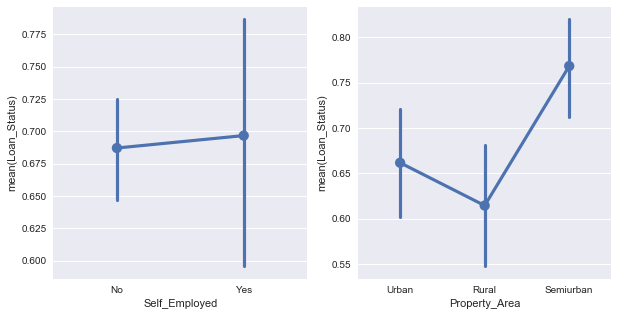

In [36]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Self_Employed', y='Loan_Status', data=df, ax=ax1)
sns.pointplot(x='Property_Area', y='Loan_Status', data=df, ax=ax2)

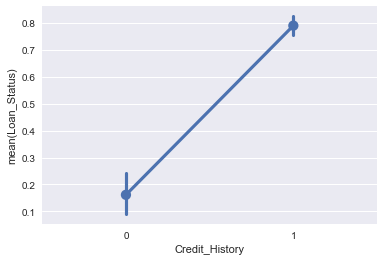

In [37]:
sns.pointplot(x='Credit_History', y='Loan_Status', data=df)

- The difference in the chance of getting approval for loans between the self-employed and not-self employed isn't big
- People who have property in the semiurban area has the highest chance of getting approval, followed by those who live in urban areas and lastly, the rural people
- Apparently, people whose credit history meets the guidelines are far more likely to get approval for loans

In [38]:
num_features

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'], dtype=object)

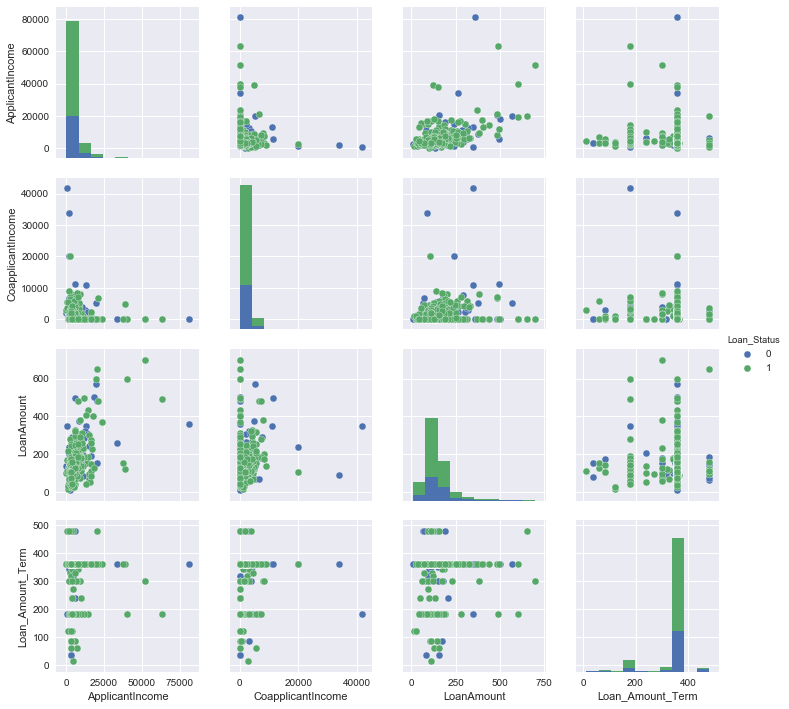

In [39]:
sns.pairplot(df,vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'],hue='Loan_Status')

## Outlier Removal

By looking at the pairplots above, we can identify some outliers that might influence our prediction accuracy. I'll remove them.

In [40]:
df = df[df['ApplicantIncome'] < 37000]

In [41]:
df = df[df['CoapplicantIncome']< 20000]

In [42]:
df = df[df['LoanAmount'] < 650]

## Encoding Categorical Features

In [43]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 613
Data columns (total 12 columns):
Loan_ID              602 non-null object
Gender               602 non-null object
Married              602 non-null object
Dependents           602 non-null object
Education            602 non-null object
Self_Employed        602 non-null object
ApplicantIncome      602 non-null int64
CoapplicantIncome    602 non-null float64
LoanAmount           602 non-null float64
Loan_Amount_Term     602 non-null float64
Credit_History       602 non-null int64
Property_Area        602 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 61.1+ KB


In [45]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,134.884058,360.0,1,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban


In [46]:
df['Dependents'] = df['Dependents'].astype('int64')

In [47]:
encoding_needed_features = ['Gender','Married','Education','Self_Employed','Property_Area']


labelEncoder = LabelEncoder()

for col in encoding_needed_features:
    X[col] = labelEncoder.fit_transform(X[col])
    
# cat_features = X.dtypes.pipe(lambda x: x[x == 'object']).index

In [48]:
X.set_index('Loan_ID', inplace=True)

## Splitting Train and Test Data

In [49]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Deciding which classification model to use

In [50]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(random_state=42), 'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42), 
          'Gradient Boosting':GradientBoostingClassifier(random_state=42)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

Results for: Logistic Regression

[[ 30  25]
 [  2 124]]
             precision    recall  f1-score   support

          0       0.94      0.55      0.69        55
          1       0.83      0.98      0.90       126

avg / total       0.86      0.85      0.84       181

accuracy is 0.850828729282



Results for: Decision Tree

[[32 23]
 [29 97]]
             precision    recall  f1-score   support

          0       0.52      0.58      0.55        55
          1       0.81      0.77      0.79       126

avg / total       0.72      0.71      0.72       181

accuracy is 0.71270718232



Results for: Random Forest

[[ 31  24]
 [  8 118]]
             precision    recall  f1-score   support

          0       0.79      0.56      0.66        55
          1       0.83      0.94      0.88       126

avg / total       0.82      0.82      0.81       181

accuracy is 0.82320441989



Results for: Gradient Boosting

[[ 25  30]
 [  8 118]]
             precision    recall  f1-score   support

   

Classifiers with top two accuracy are logistic regression and random forest classifier. By setting different values to various parameters, we can potentially improve our accuracy

## Logistic Regression

In [51]:
logis_regr1 = LogisticRegression(random_state=42)
logis_regr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
print(classification_report(y_test, logis_regr1.predict(X_test)))
print(accuracy_score(y_test,logis_regr1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.55      0.69        55
          1       0.83      0.98      0.90       126

avg / total       0.86      0.85      0.84       181

0.850828729282


In [53]:
logis_regr2 = LogisticRegression(random_state=42, class_weight='balanced')
logis_regr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
print(classification_report(y_test, logis_regr2.predict(X_test)))
print(accuracy_score(y_test,logis_regr2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.63      0.60      0.62        55
          1       0.83      0.85      0.84       126

avg / total       0.77      0.77      0.77       181

0.773480662983


In [55]:
C_values = [0.001, 0.003, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 0.33, 0.35, 0.38, 0.4, 0.5, 0.8, 1, 5, 10, 30, 50, 100]
accuracy = []

for c in C_values:
    logis_regr3 = LogisticRegression(random_state=42,C=c)
    logis_regr3.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, logis_regr3.predict(X_test)))

C_value_with_best_accuracy = C_values[pd.Series(accuracy).idxmax()]
print(C_value_with_best_accuracy)
print(accuracy[pd.Series(accuracy).idxmax()])

0.3
0.850828729282


In [56]:
logis_regr3 = LogisticRegression(random_state=42,C=0.3)
logis_regr3.fit(X_train, y_train)

print(classification_report(y_test, logis_regr3.predict(X_test)))
print(accuracy_score(y_test,logis_regr3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.55      0.69        55
          1       0.83      0.98      0.90       126

avg / total       0.86      0.85      0.84       181

0.850828729282


## Random Forest Classifier

In [57]:
rfc1 = RandomForestClassifier(n_estimators=300, random_state=42)
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [58]:
print(classification_report(y_test, rfc1.predict(X_test)))
print(accuracy_score(y_test,rfc1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.79      0.56      0.66        55
          1       0.83      0.94      0.88       126

avg / total       0.82      0.82      0.81       181

0.82320441989


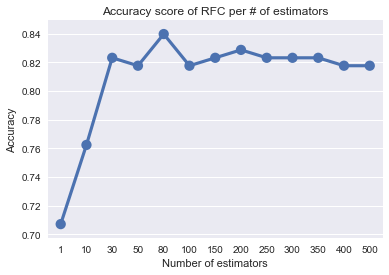

In [59]:
# Exploring the number of estimators in the random forest

score = []
est = []
estimators = [1, 10, 30, 50, 80, 100, 150, 200,250, 300, 350, 400, 500]
for e in estimators:
    random_forest_1 = RandomForestClassifier(n_estimators=e, random_state=42)
    pred1 = random_forest_1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
    
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')

Looks like 80 is the optimal number of estimators for the accuracy score to be the highest

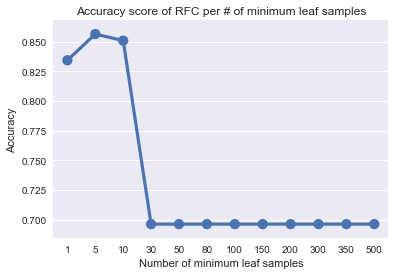

In [60]:
# Exploring minimum leaf samples

score = []
leaf = []
leaf_options = [1, 5, 10, 30, 50, 80, 100, 150, 200, 300, 350, 500]
for i in leaf_options:
    random_forest_2 = RandomForestClassifier(n_estimators=80, random_state=52, min_samples_leaf=i)
    pred2 = random_forest_2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(i)

plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')

Looks like 10 is the optimal number of minimum leaf samples for the accuracy score to be the highest

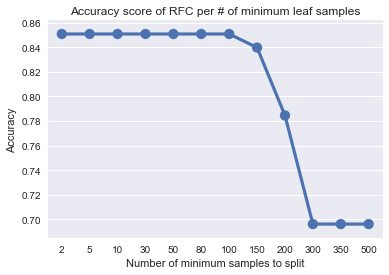

In [61]:
# Exploring minimum leaf samples

score = []
split = []
split_num_options = [2, 5, 10, 30, 50, 80, 100, 150, 200, 300, 350, 500]
for s in split_num_options:
    random_forest_3 = RandomForestClassifier(n_estimators=80, random_state=42, min_samples_leaf=10, min_samples_split=s)
    pred3 = random_forest_3.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred3)
    score.append(accuracy)
    split.append(s)

plot = sns.pointplot(x=split, y=score)
plot.set(xlabel='Number of minimum samples to split', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')

Accuracy drops after 100 samples. So, it might be a good idea to set the minimum number of samples to split as 100.

In [62]:
rfc2 = RandomForestClassifier(n_estimators=80, random_state=42, min_samples_leaf=10, min_samples_split=100)

rfc2.fit(X_train, y_train)

print(classification_report(y_test, rfc2.predict(X_test)))
print(accuracy_score(y_test,rfc2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.53      0.68        55
          1       0.83      0.99      0.90       126

avg / total       0.87      0.85      0.84       181

0.850828729282


#### Feature Importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

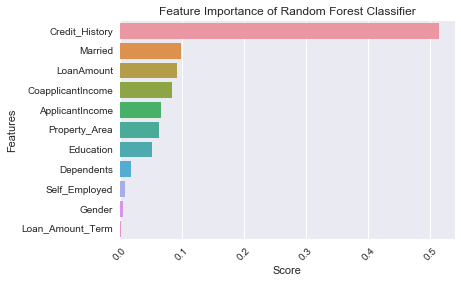

In [63]:
dn = {'features':X.columns, 'score':rfc2.feature_importances_}
dataframe = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)

plot = sns.barplot(x='score', y='features', data=dataframe, orient='h')

plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')

plt.setp(plot.get_xticklabels(), rotation=45)

## SVC

#### Linear SVC

In [64]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

print('Accuracy: %.2f' % accuracy_score(y_test, svm_linear.predict(X_test)))
print(classification_report(y_test, svm_linear.predict(X_test)))

Accuracy: 0.79
             precision    recall  f1-score   support

          0       0.90      0.35      0.50        55
          1       0.78      0.98      0.87       126

avg / total       0.81      0.79      0.76       181



In [65]:
svm_linear_C_values =\
[0.0005, 0.001, 0.003, 0.005, 0.008, 0.01, 0.03, 0.05, 0.08, 0.1, 0.3, 0.33, 0.35, 0.38, 0.4, 0.5, 0.8, 1, 5, 10, 30, 50, 100]
svm_linear_accuracy = []

for c in svm_linear_C_values:
    svm_linear2 = LogisticRegression(random_state=42,C=c)
    svm_linear2.fit(X_train, y_train)
    svm_linear_accuracy.append(accuracy_score(y_test, svm_linear2.predict(X_test)))

svm_linear_C_value_with_best_accuracy = svm_linear_C_values[pd.Series(accuracy).idxmax()]
print(svm_linear_C_value_with_best_accuracy)
print(svm_linear_accuracy[pd.Series(svm_linear_accuracy).idxmax()])

0.0005
0.850828729282


#### Non Linear SVC

In [66]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

print('Accuracy: %.2f' % accuracy_score(y_test, svm_rbf.predict(X_test)))
print(classification_report(y_test, svm_rbf.predict(X_test)))

Accuracy: 0.70
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        55
          1       0.70      1.00      0.82       126

avg / total       0.48      0.70      0.57       181



C:\Users\Seungjun\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## MLP Classifier

In [67]:
mlp = MLPClassifier(solver='lbfgs',random_state=42)
mlp.fit(X,y)
scores=cross_val_score(mlp,X,y,cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.56 (+/- 0.11)


## Perceptron

In [68]:
perceptron = Perceptron(n_iter=15, eta0=0.1, random_state=0)
perceptron.fit(X_train, y_train)
print('Accuracy: %.2f' % accuracy_score(y_test, perceptron.predict(X_test)))

Accuracy: 0.70


## Wrangling Test Data for final prediction

In [69]:
test = pd.read_csv('loan_test.csv')

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Filling in missing values in test data

In [71]:
test['Gender'] = test.groupby(['Married','Education','Dependents'])['Gender'].ffill().bfill()

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [73]:
test['Dependents'] = test.groupby(['Gender','Education','Married'])['Dependents'].ffill().bfill()

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [75]:
test['Self_Employed'] = test.groupby(['Gender','Education','Married','Dependents'])['Self_Employed'].ffill().bfill()

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [77]:
test['LoanAmount'] = test.groupby(['Gender','Education','Married','Dependents','Self_Employed']).\
transform(lambda x: x.fillna(x.mean()))['LoanAmount']

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [79]:
test['Loan_Amount_Term'] = test.groupby(['Gender','Education','Married','Dependents','Self_Employed']).\
transform(lambda x: x.fillna(x.mean()))['Loan_Amount_Term']

In [80]:
test['Credit_History'] = test.groupby(['Gender','Education','Married','Dependents','Self_Employed'])['Credit_History'].ffill().bfill()

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Fixing Weird Labels in Test Data

In [82]:
for col in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status']:
    print(test[col].value_counts(),'\n')

Male      292
Female     75
Name: Gender, dtype: int64 

Yes    233
No     134
Name: Married, dtype: int64 

0     206
1      61
2      60
3+     40
Name: Dependents, dtype: int64 

Graduate        283
Not Graduate     84
Name: Education, dtype: int64 

No     327
Yes     40
Name: Self_Employed, dtype: int64 

3500     6
5000     6
3333     5
7500     4
4333     4
2500     4
4083     3
5833     3
4000     3
6500     3
3417     3
10000    3
4483     2
2157     2
3276     2
2400     2
3391     2
4500     2
4700     2
5333     2
2166     2
3250     2
3958     2
2600     2
0        2
4742     2
2783     2
1516     2
1750     2
5667     2
        ..
2779     1
2914     1
1596     1
2917     1
2918     1
2964     1
7016     1
2922     1
3522     1
1900     1
2925     1
6478     1
1888     1
5314     1
2360     1
6958     1
3887     1
4912     1
4402     1
2356     1
8334     1
2362     1
3400     1
3900     1
3901     1
2366     1
2083     1
13633    1
3909     1
2875     1
Name: ApplicantIn

KeyError: 'Loan_Status'

In [83]:
test['Dependents'] = test['Dependents'].replace({'3+':3})

### Exploratory Data Analysis (EDA) of Test Data

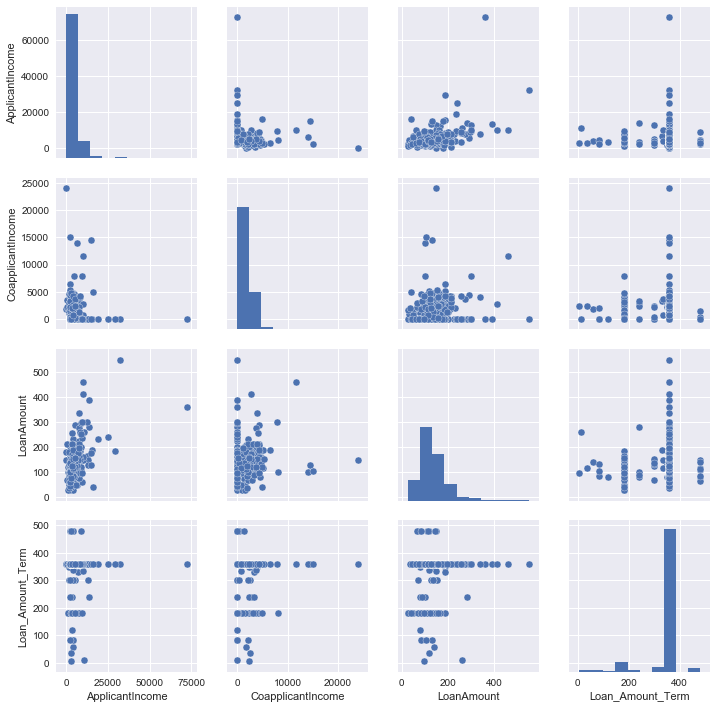

In [84]:
sns.pairplot(test,vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'])

### Outlier Removal of Test Data

In [85]:
# test = test[test['ApplicantIncome'] < 60000]

In [86]:
# test = test[test['CoapplicantIncome']< 20000]

In [87]:
# test = test[test['LoanAmount'] < 430]

### Encoding Categorical Features of Test Data

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [89]:
test['Dependents'] = test['Dependents'].astype('int64')

In [90]:
encoding_needed_features_in_test_data = ['Gender','Married','Education','Self_Employed','Property_Area']


labelEncoder = LabelEncoder()

for col in encoding_needed_features_in_test_data:
    test[col] = labelEncoder.fit_transform(test[col])

## Making Final prediction dataframe and saving it as csv

In [91]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [93]:
test.set_index(['Loan_ID'], inplace=True)

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
dtypes: float64(3), int64(8)
memory usage: 34.4+ KB


In [95]:
test2 = test.copy()
test3 = test.copy()

In [96]:
test['Loan_Status'] = logis_regr1.predict(test)
test2['Loan_Status'] = logis_regr3.predict(test2)
test3['Loan_Status'] = rfc2.predict(test3)

In [97]:
final_pred_df = test.loc[:,['Loan_Status']]
final_pred_df2 = test2.loc[:,['Loan_Status']]
final_pred_df3 = test3.loc[:,['Loan_Status']]

In [98]:
final_pred_df.reset_index(inplace=True)
final_pred_df2.reset_index(inplace=True)
final_pred_df3.reset_index(inplace=True)

In [99]:
final_pred_df['Loan_Status'] = final_pred_df['Loan_Status'].replace({1:'Y',0:'N'})
final_pred_df2['Loan_Status'] = final_pred_df2['Loan_Status'].replace({1:'Y',0:'N'})
final_pred_df3['Loan_Status'] = final_pred_df3['Loan_Status'].replace({1:'Y',0:'N'})

In [100]:
final_pred_df.to_csv('Seungjun-Kim-Loan-Prediction1.csv',sep=',',index=False)
final_pred_df2.to_csv('Seungjun-Kim-Loan-Prediction2.csv',sep=',',index=False)
final_pred_df3.to_csv('Seungjun-Kim-Loan-Prediction3.csv',sep=',',index=False)